In [3]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Some configs
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['savefig.dpi'] = 200
# plt.rcParams['font.size'] = 12
# plt.rcParams['legend.fontsize'] = 'large'
# plt.rcParams['figure.titlesize'] = 'medium'

In [5]:
# Load data
df = pd.read_csv('./data/Insurance.csv')

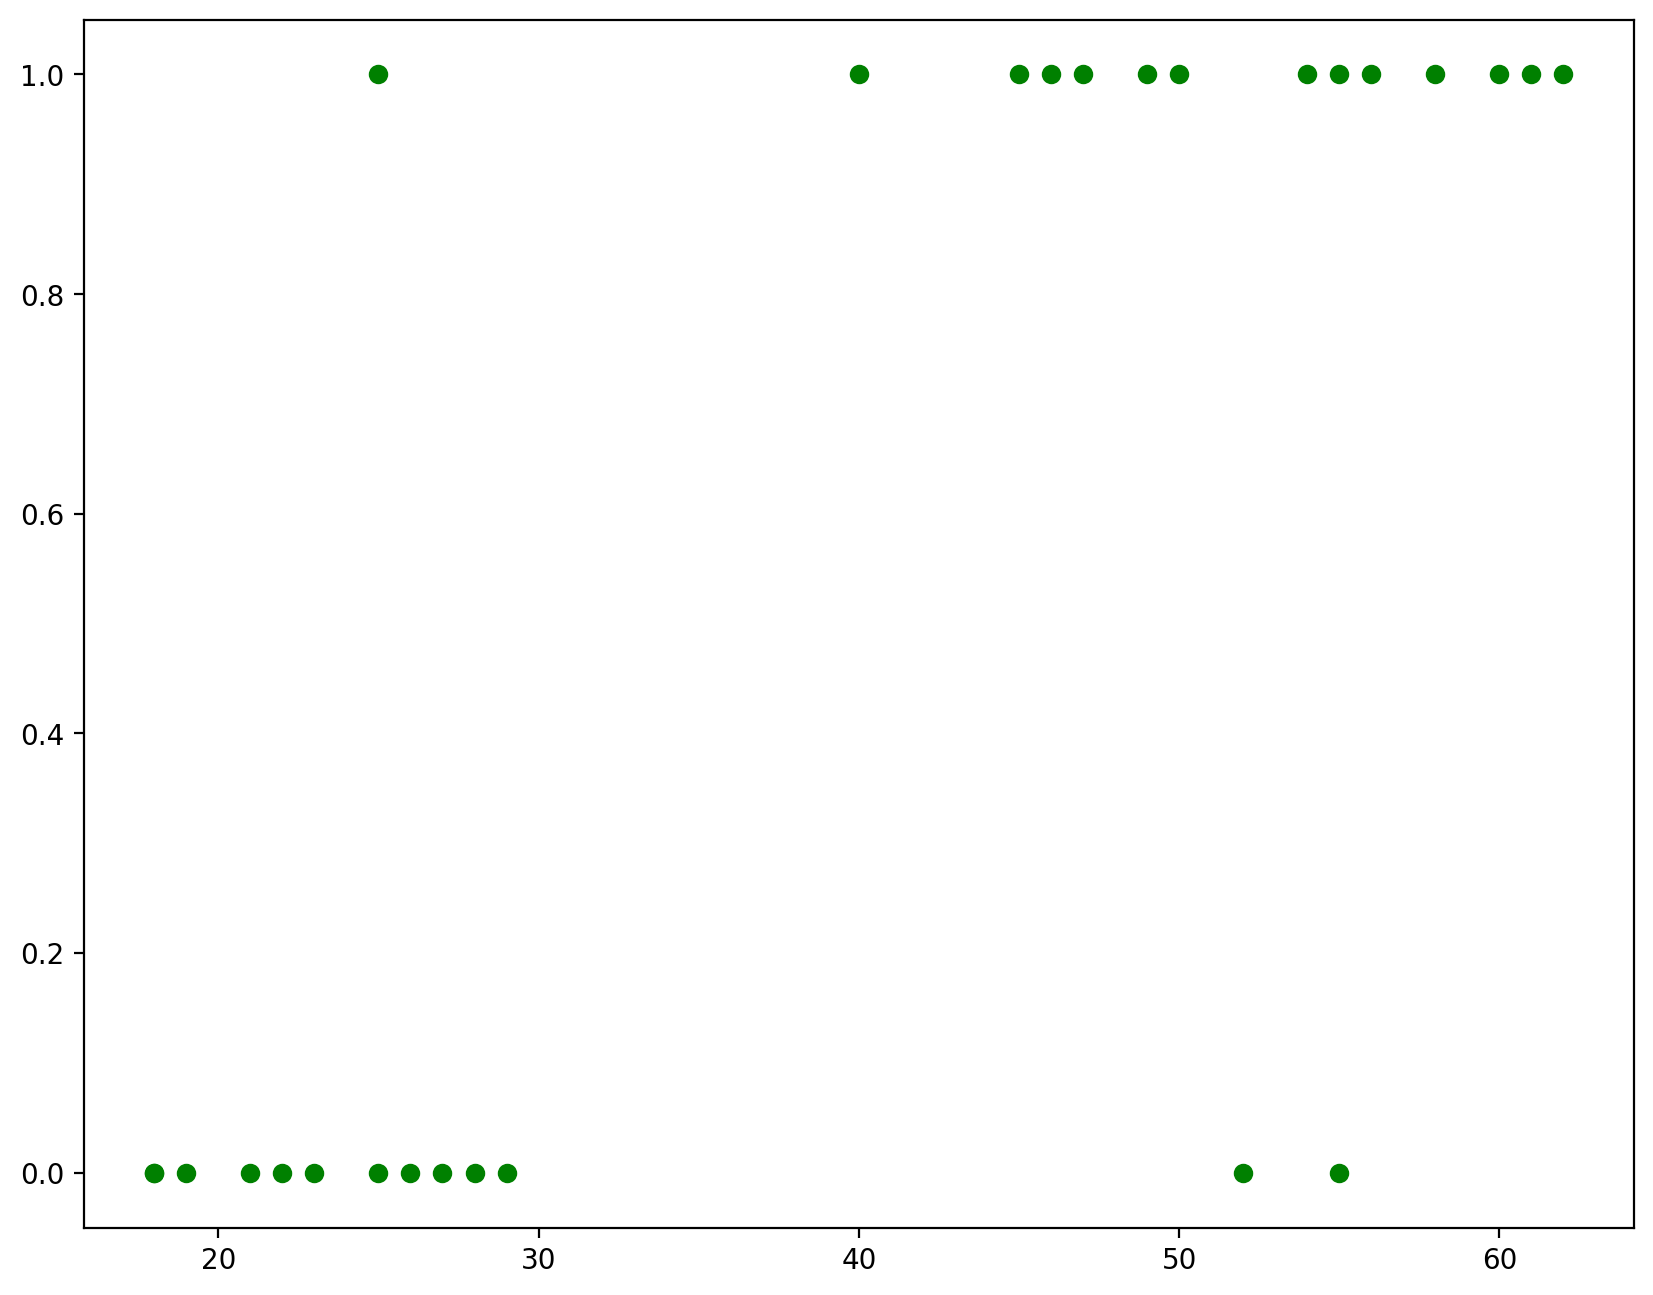

In [27]:
plt.scatter(df['age'], df['bought_insurance'], color="green", marker='o')


In [7]:
# Split train/test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)


In [8]:
# Create model and fit it
from sklearn.linear_model import LogisticRegression
# model = LogisticRegression().fit(x_train, y_train)
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x_train, y_train)

In [9]:
# Get results and evaluate the model
intercept = model.intercept_
coefs = model.coef_
score = model.score(x_train, y_train)
prob_matrix = model.predict_proba(x_train)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred = model.predict(x_train)
print(classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.86      0.92      0.89        13

    accuracy                           0.88        24
   macro avg       0.88      0.87      0.87        24
weighted avg       0.88      0.88      0.87        24



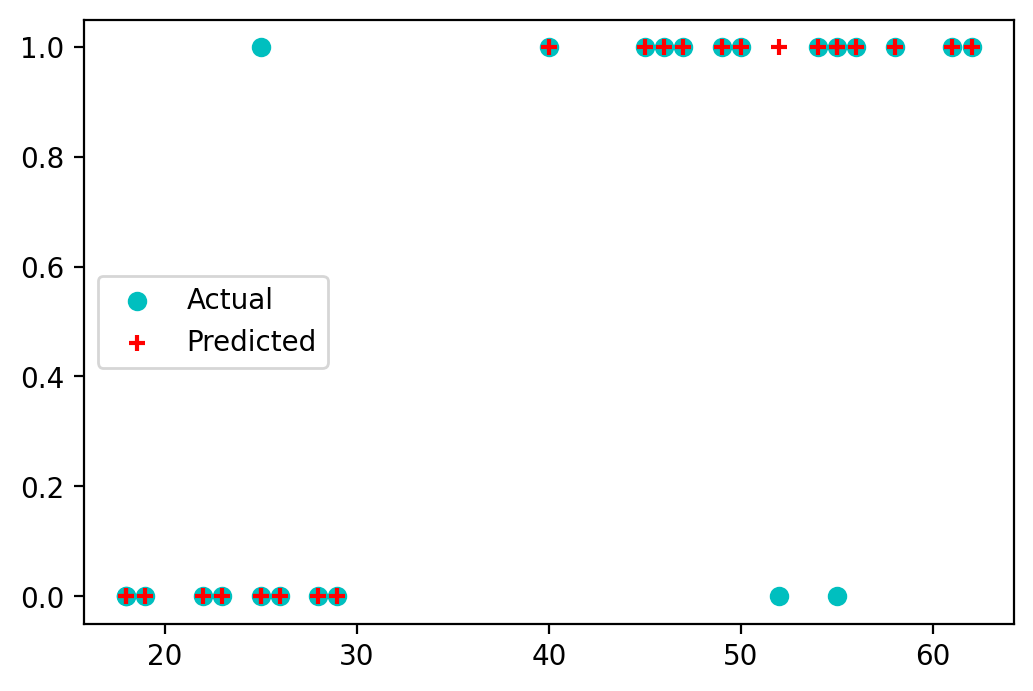

In [11]:
plt.scatter(x_train, y_train, color="c", marker='o', label='Actual')
plt.scatter(x_train, y_train_pred, color="r", marker='+', label='Predicted')
plt.legend(loc='center left')

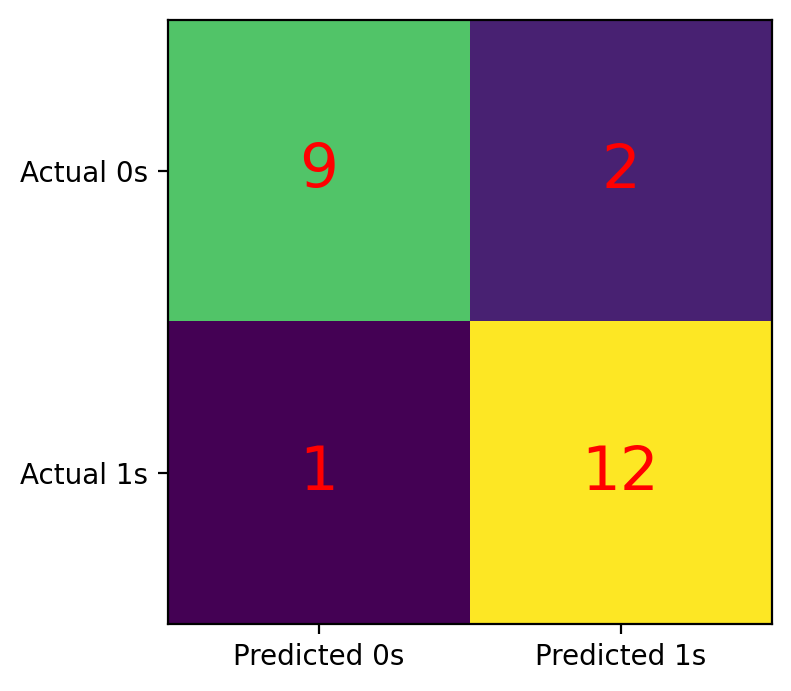

In [12]:
fig, ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='r', fontsize=22)
plt.show()

In [13]:
# Making predictions
y_pred = model.predict(x_test)
pred_score = model.score(x_test, y_test)
pred_prob_matrix = model.predict_proba(x_test)
pred_prob_matrix

array([[0.83459272, 0.16540728],
       [0.08738805, 0.91261195],
       [0.73274847, 0.26725153]])

In [14]:
# Define prediction function via Sigmoid
from com_func import sigmoid
def prediction_function(age, inter, coef):
    z = inter + coef * age
    return sigmoid(z)

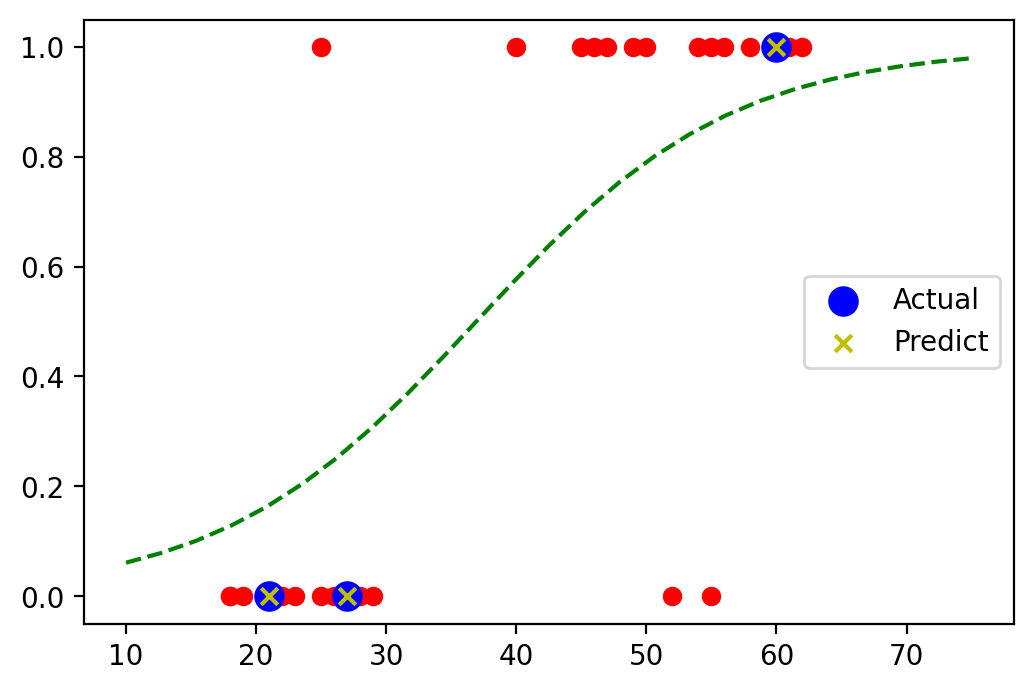

In [15]:
# Draw sigmoid plot
plt.scatter(x_train, y_train, color="r", marker='o')
# plt.scatter(df['age'], df['bought_insurance'], color="r", marker='o')
X_test = np.linspace(10, 75, 25)
sigs = []
for item in X_test:
    sigs.append(prediction_function(item, intercept[0], coefs[0][0]))
plt.plot(X_test, sigs, color='g', linestyle='--')
plt.scatter(x_test, y_test, color='b', s=100, label='Actual')
plt.scatter(x_test, y_pred, color='y', marker='x', label='Predict')
plt.legend(loc='center right')
plt.show()

In [16]:
# Predict future values using prediction_function()
pred_prob = prediction_function(56, intercept[0], coefs[0][0])
pred_prob


0.8742794396710316